### Clean data for machine learning.

In [103]:
import pandas as pd
import numpy as np

filename = "data\properties.csv"
df = pd.read_csv(filename)
print(df.shape)
df.head()


(75511, 30)


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [104]:
# Check how many rows of each attribute are NaN to decide columns importance
print ((df.isnull().sum()).sort_values(ascending=False)) 


cadastral_income                  44967
surface_land_sqm                  36256
construction_year                 33391
primary_energy_consumption_sqm    26567
nbr_frontages                     26346
longitude                         14098
latitude                          14098
terrace_sqm                       13140
total_area_sqm                     7615
garden_sqm                         2939
province                              0
region                                0
subproperty_type                      0
property_type                         0
zip_code                              0
locality                              0
id                                    0
price                                 0
fl_open_fire                          0
fl_furnished                          0
nbr_bedrooms                          0
equipped_kitchen                      0
fl_garden                             0
fl_terrace                            0
fl_floodzone                          0


In [105]:
if (df.isnull().sum().sum()) != 0:

    #Replace empty strings with nan.
    df.replace('', np.nan, inplace=True) 

    #Make NaN as the placeholder for every null value representation
    df.fillna(value=np.nan, inplace=True)


### Preprocess data for machine learning.

In [106]:
# numeric_df for numeric data only to make corr and preprocessing 
numeric_df = df.select_dtypes(include='number')
pd.DataFrame.corr(numeric_df)
price_correlation = pd.DataFrame(pd.DataFrame.corr(numeric_df)['price']).sort_values('price', ascending=False, key=abs)
price_correlation


,price
price,1.000000
nbr_bedrooms,0.352447
total_area_sqm,0.199650
fl_swimming_pool,0.196067
latitude,0.166984
surface_land_sqm,0.149360
nbr_frontages,0.146034
terrace_sqm,0.114349
longitude,-0.091013
garden_sqm,0.087180


In [107]:
#Drop columns with low price corr
df = df.drop(columns=['epc','region','locality','latitude','longitude',
                       'cadastral_income','subproperty_type','fl_open_fire',
                       'construction_year','fl_double_glazing','id', 
                       'fl_floodzone', 'equipped_kitchen','fl_furnished','fl_garden','fl_terrace','fl_swimming_pool'])
df_cleaned = df[~df['heating_type'].isin(['MISSING'])]
df_cleaned = df_cleaned[~df_cleaned['state_building'].isin(['MISSING'])]
df_cleaned = df_cleaned[~df_cleaned['primary_energy_consumption_sqm'].isna()]


numeric_df = df_cleaned.select_dtypes(include='number')
numeric_df
print('rows after Droping unneccesry ', df_cleaned.shape[0])
print('cols after cleaningDroping unneccesry',df_cleaned.shape[1])


rows after Droping unneccesry  26355
cols after cleaningDroping unneccesry 13


In [108]:
from sklearn.impute import SimpleImputer

# Logical zero for Apartment not mean
numeric_df.fillna({'surface_land_sqm': 0}, inplace=True)

# Impute missing values in each column separately
imputer = SimpleImputer(strategy='mean')
numeric_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# DoubleCheck if rows of each attribute have NaN
print ((numeric_df.isnull().sum()).sort_values(ascending=False))


price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
dtype: int64


Categorical columns
- property_type  [OneHotEncoder] using scikit-learn
- state_building [Ordinal]
- heating_type [Ordinal]
- locality

Text(0.5, 0, 'Price (Median)')

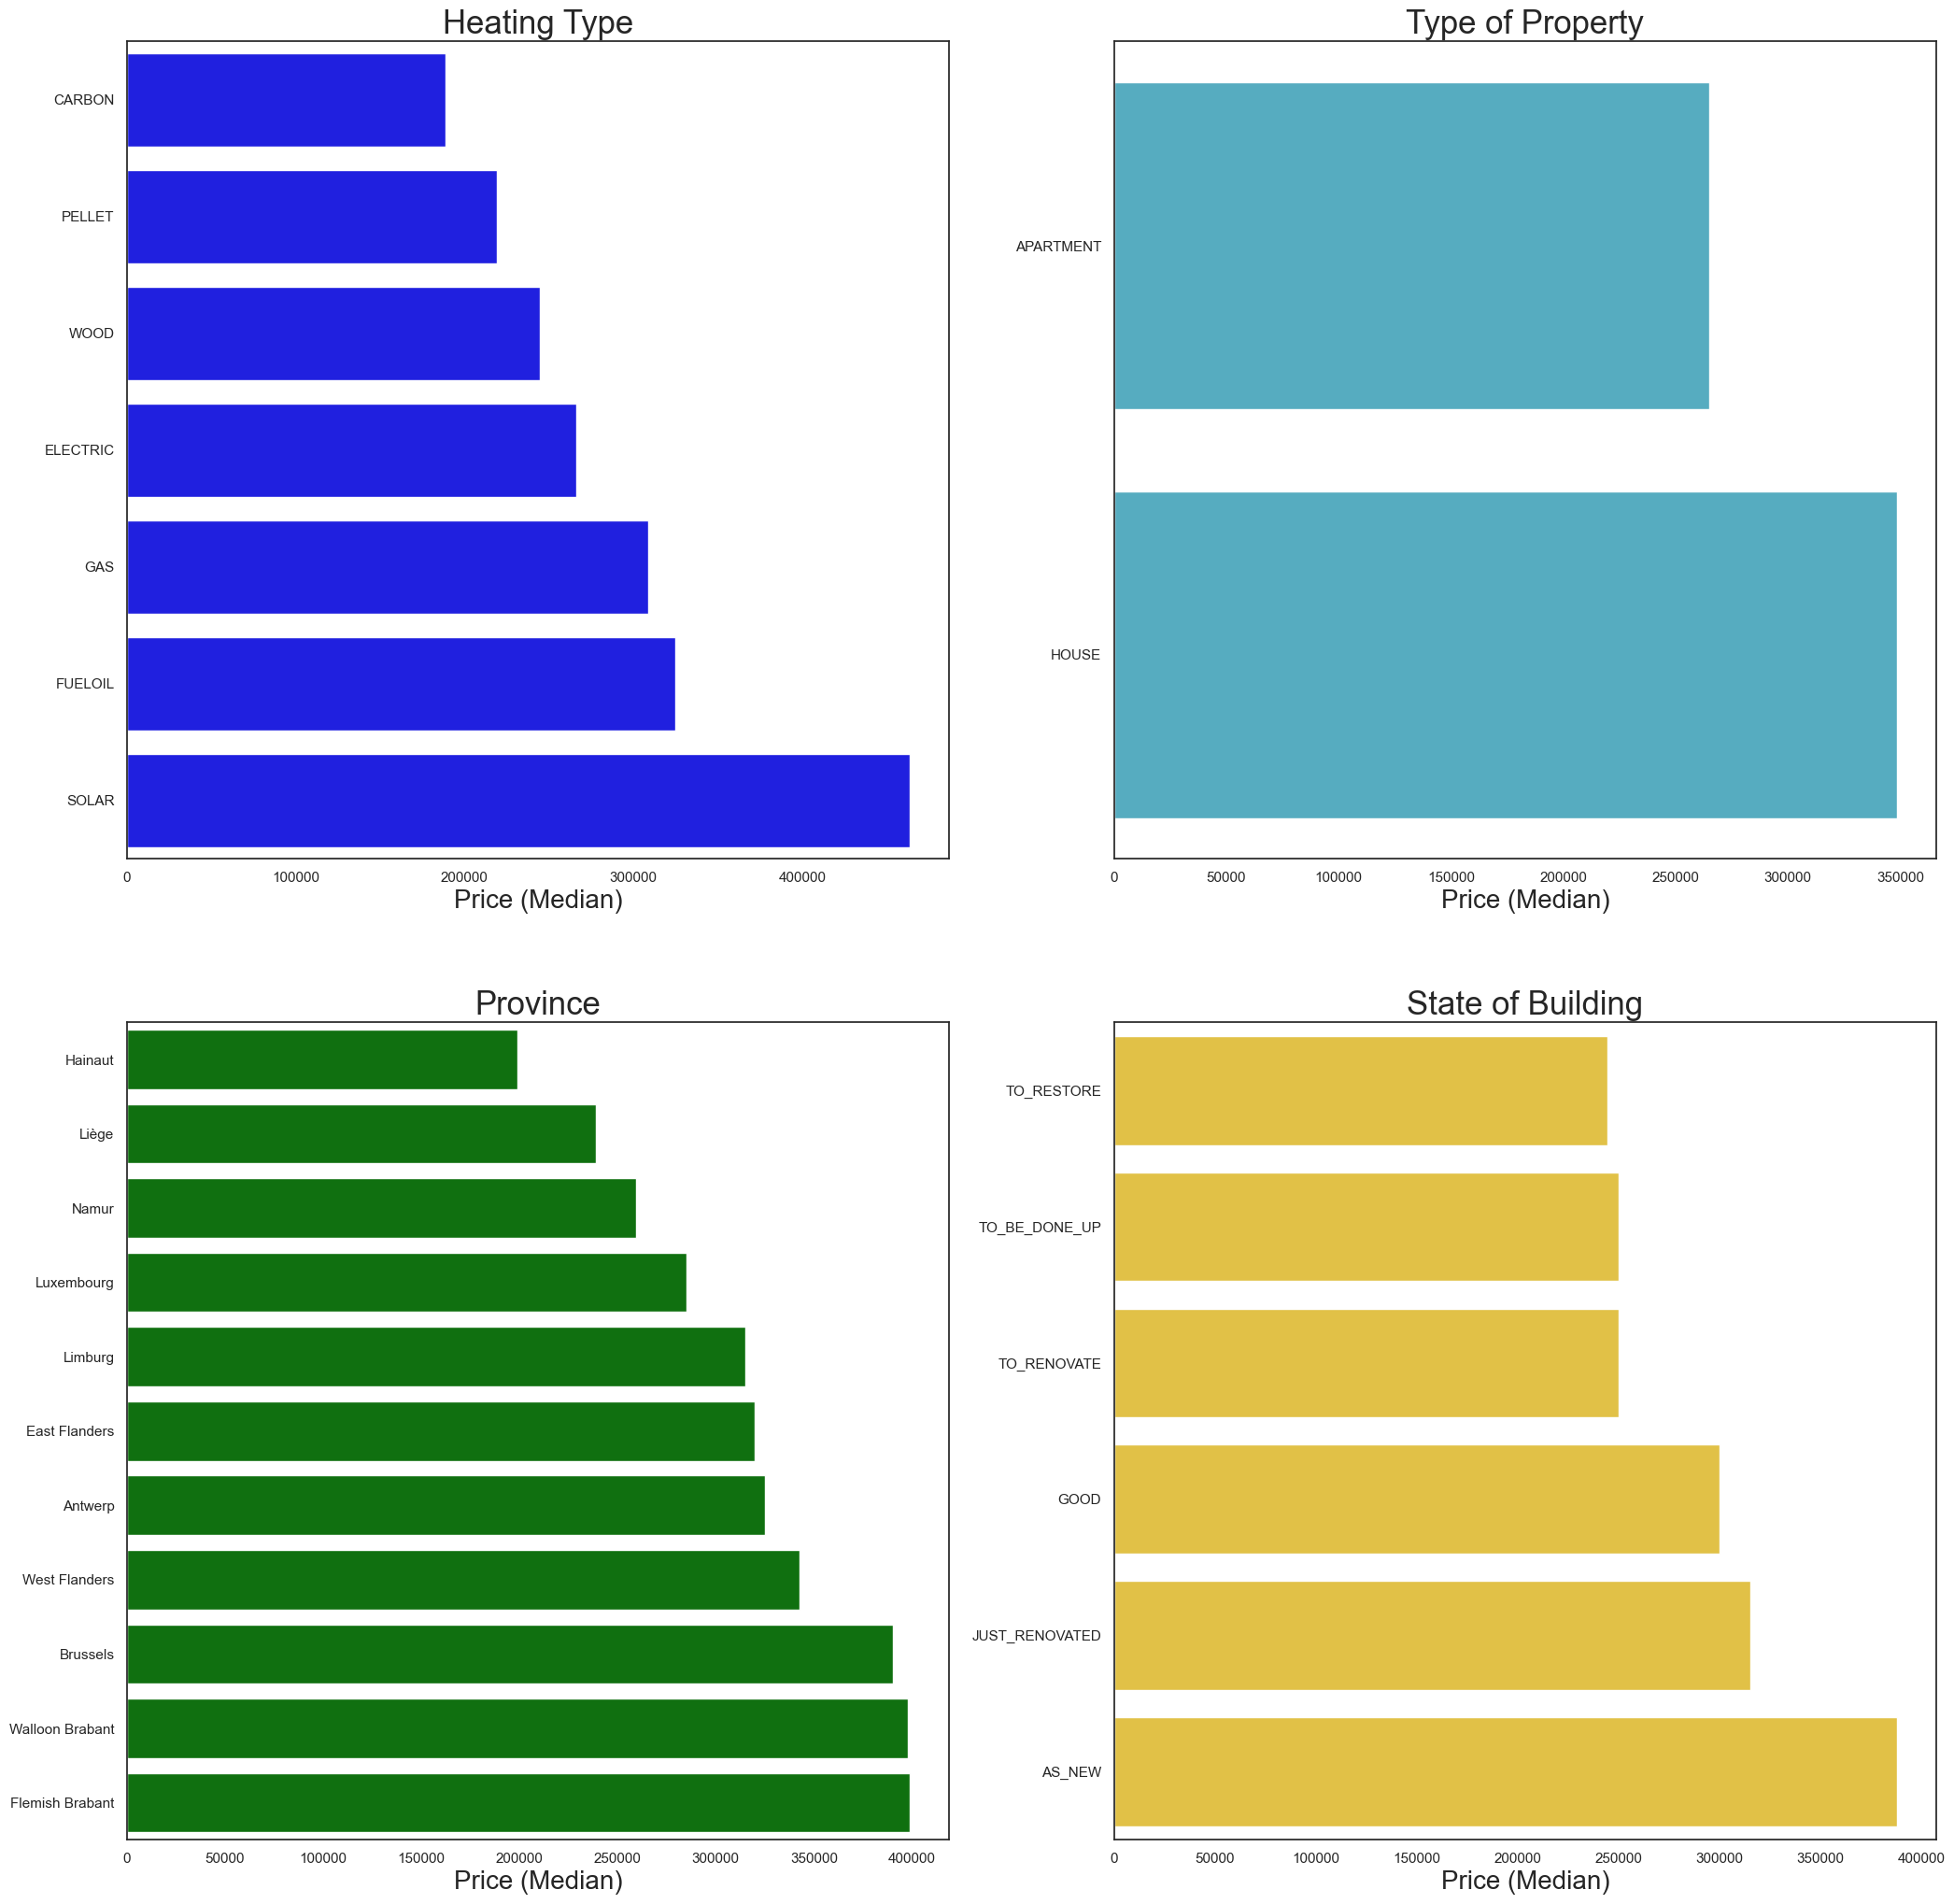

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

#heating_type
df_building = pd.DataFrame(df_cleaned, columns= ['heating_type', 'price'])
df_building_median = pd.DataFrame(df_building.groupby('heating_type', as_index=False).median().sort_values(by='price'))


# #kitchen
# df_kitchen = pd.DataFrame(df_cleaned, columns= ['equipped_kitchen', 'price'])
# df_kitchen_median = pd.DataFrame(df_kitchen.groupby('equipped_kitchen', as_index=False).median().sort_values(by='price'))

 #Province
df_Province = pd.DataFrame(df_cleaned, columns= ['province', 'price'])
df_Province_median = pd.DataFrame(df_Province.groupby('province', as_index=False).median().sort_values(by='price'))

#state_building
df_state_building= pd.DataFrame(df_cleaned, columns= ['state_building', 'price'])
df_state_building_median = pd.DataFrame(df_state_building.groupby('state_building', as_index=False).median().sort_values(by='price'))

#type
df_type = pd.DataFrame(df_cleaned, columns= ['property_type', 'price'])
df_type_median = pd.DataFrame(df_type.groupby('property_type', as_index=False).median().sort_values(by='price'))



fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25,25))
plt.rcParams["axes.labelsize"] = 15
sns.set_theme(style="white", palette='YlGnBu', color_codes=True)


sns.barplot(data= df_building_median, x=df_building_median.price, color='b', y=df_building_median.heating_type,
              ax=axs[0][0]).set_title("Heating Type", fontdict={'size': 25})

sns.barplot(data= df_type_median, x=df_type_median.price, color= "#45B7D1", y=df_type_median.property_type,  
            ax=axs[0][1]).set_title("Type of Property", fontdict={'size': 25})

# sns.barplot(data= df_kitchen_median, x=df_kitchen_median.price,color= "g",  y=df_kitchen_median.equipped_kitchen, 
#             ax= axs[1][0]).set_title("Equipped Kitchen", fontdict={'size': 25})

sns.barplot(data= df_Province_median, x=df_Province_median.price,color= "g",  y=df_Province_median.province, 
            ax= axs[1][0]).set_title("Province", fontdict={'size': 25})

sns.barplot(data= df_state_building, x=df_state_building_median.price, color= '#FAD02E', y=df_state_building_median.state_building,
              ax=axs[1][1]).set_title("State of Building", fontdict={'size': 25})



(axs[0][0]).set_ylabel('', fontdict={'size': 20})
(axs[0][0]).set_xlabel('Price (Median)', fontdict={'size': 20})

(axs[0][1]).set_ylabel('')
(axs[0][1]).set_xlabel('Price (Median)', fontdict={'size': 20})


(axs[1][0]).set_ylabel('')
(axs[1][0]).set_xlabel('Price (Median)', fontdict={'size': 20})

(axs[1][1]).set_ylabel('')
(axs[1][1]).set_xlabel('Price (Median)', fontdict={'size': 20})

In [110]:
from sklearn.preprocessing import OneHotEncoder

#Encodeing for property_type
property_type = df_cleaned[["property_type"]]
enc = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
property_type_encoded = enc.fit_transform(property_type)

# Make sure indexes match before joining to avoid NaN when joining
property_type_encoded.index = numeric_df.index 
numeric_df = numeric_df.join(property_type_encoded)

print(numeric_df.isnull().sum())
print (property_type_encoded.isnull().sum())
numeric_df.rename(columns = {'property_type_HOUSE':'property_type'}, inplace = True)
print (numeric_df.isnull().sum())



price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
property_type_HOUSE               0
dtype: int64
property_type_HOUSE    0
dtype: int64
price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
property_type                     0
dtype: int64


In [111]:

correlation_matrix = numeric_df[['property_type', 'price']].corr()
correlation_with_price = correlation_matrix['price']['property_type']
print(correlation_with_price)


0.10705296277774745


In [112]:
from sklearn.preprocessing import OrdinalEncoder
#Encoding for state_building
building_state = df_cleaned[['state_building']]
building_state_hierarchy = [
'TO_RESTORE',
'TO_BE_DONE_UP',
'TO_RENOVATE',
'JUST_RENOVATED',
'GOOD',
'AS_NEW'
]

encoder = OrdinalEncoder(categories=[building_state_hierarchy])
building_state_encoded= encoder.fit_transform(building_state)

building_state_encoded_df = pd.DataFrame(
    building_state_encoded, columns=['state_building'], index=numeric_df.index
)

numeric_df = numeric_df.join(building_state_encoded_df)

In [113]:
#Encoding for heating_type 
energy_order = {
    'CARBON': 0,
    'WOOD': 1,
    'PELLET': 2,
    'FUELOIL': 3,
    'GAS': 4,
    'ELECTRIC': 5,
    'SOLAR': 6,
}

heat_type_encoded = df_cleaned['heating_type']
heat_type_encoded= df_cleaned['heating_type'].map(energy_order)
heat_type_encoded.index = numeric_df.index 
numeric_df = numeric_df.join(heat_type_encoded)

In [114]:
from sklearn.preprocessing import OneHotEncoder

#Encodeing for property_type
province = df_cleaned[["province"]]
enc = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
province_encoded = enc.fit_transform(province)

# Make sure indexes match before joining to avoid NaN when joining
province_encoded.index = numeric_df.index 
numeric_df = numeric_df.join(province_encoded)

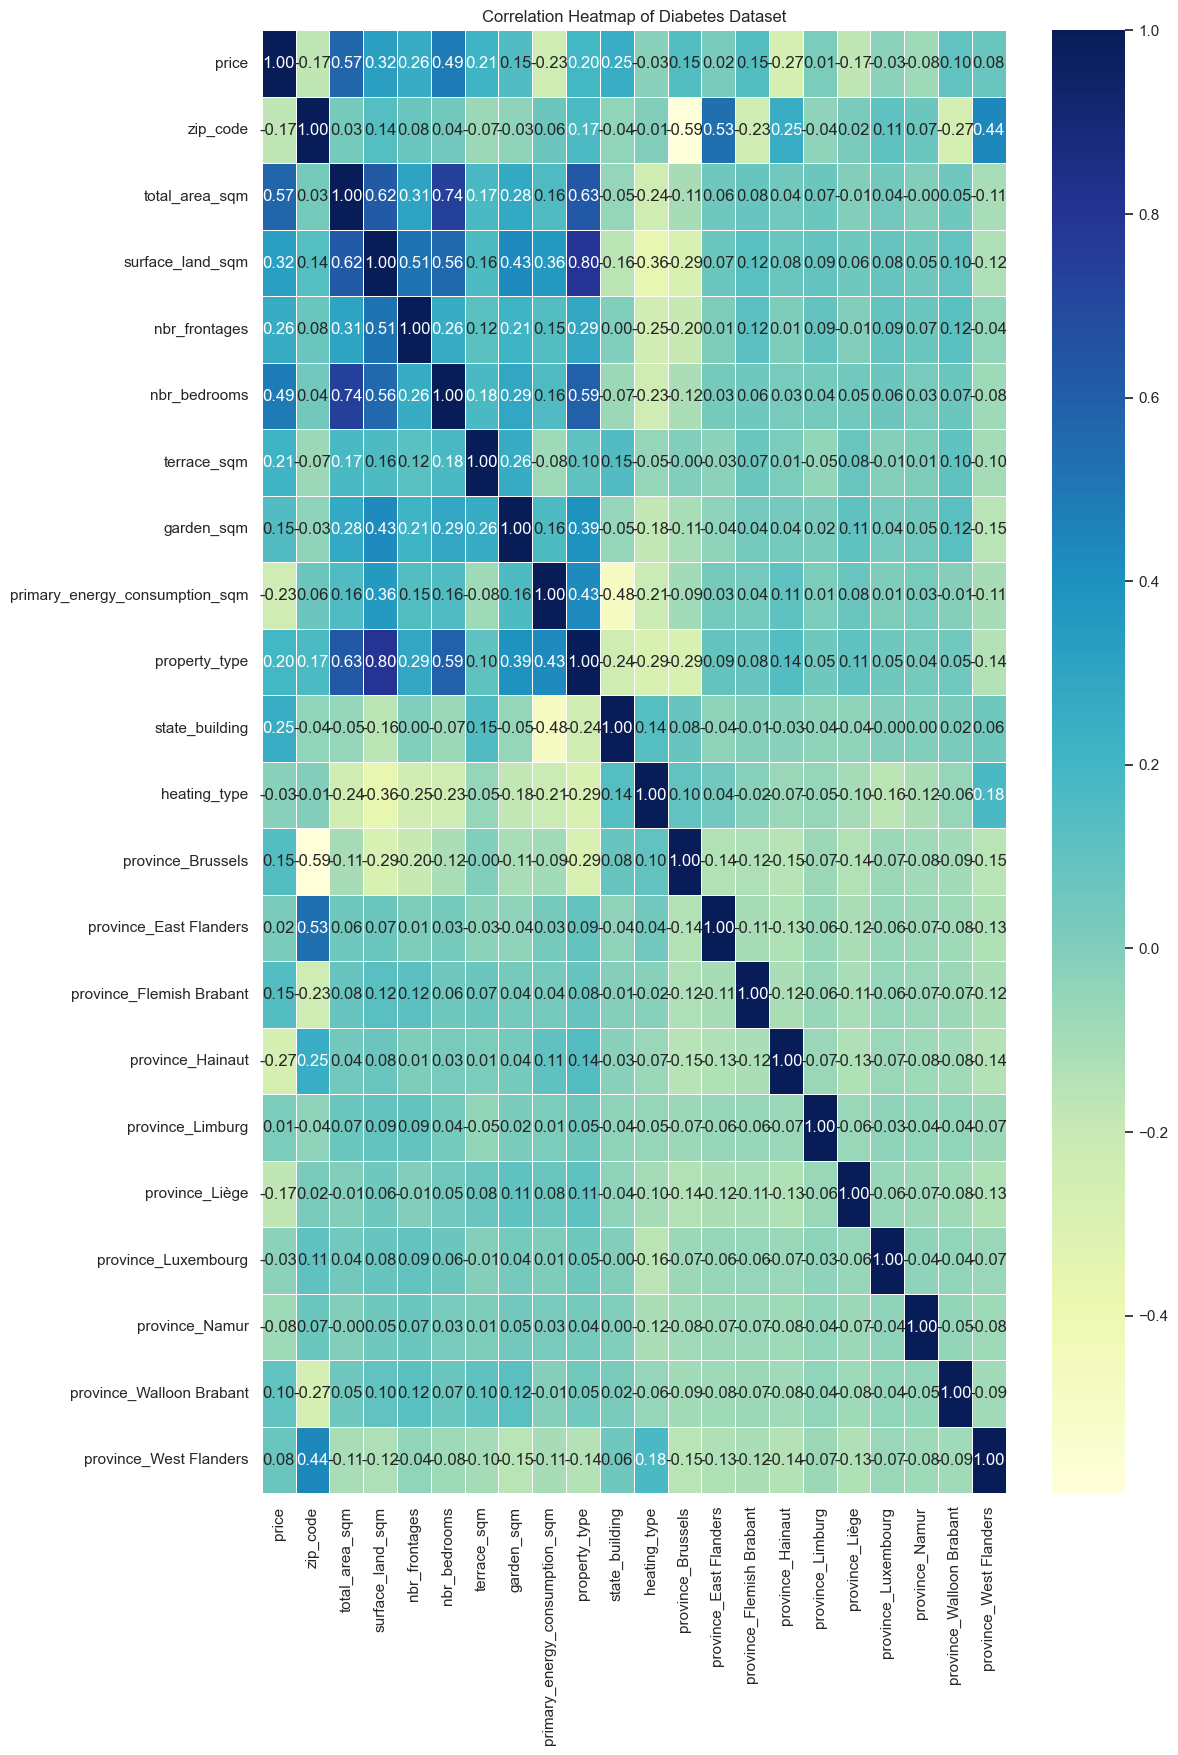

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
#Correlation After Preprosessing
corr_matrix = numeric_df.corr(method='spearman')
plt.figure(figsize=(12, 19))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()

In [116]:


#Apartment
df_apat = numeric_df[numeric_df['property_type'] == 0]
print(len(df_apat['property_type'])) #Same as surface_land_sqm 
numeric_df.isnull().sum()
numeric_df

9973


,price,zip_code,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,terrace_sqm,garden_sqm,primary_energy_consumption_sqm,property_type,...,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
0,982700.0,1410.0,169.000000,0.0,2.00000,2.0,20.00000,142.000000,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,110000.0,6010.0,150.000000,0.0,2.00000,2.0,13.45191,0.000000,386.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,920000.0,8670.0,174.196395,897.0,4.00000,4.0,40.00000,0.000000,139.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1495000.0,1083.0,583.000000,1627.0,4.00000,5.0,13.45191,0.000000,498.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,549000.0,9240.0,185.000000,571.0,4.00000,4.0,0.00000,0.000000,142.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26350,275000.0,6700.0,174.196395,0.0,2.77318,3.0,0.00000,0.000000,648.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26351,199000.0,4100.0,89.000000,0.0,2.00000,2.0,7.00000,0.000000,217.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26352,780000.0,1200.0,141.000000,0.0,2.00000,3.0,12.00000,0.000000,95.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26353,798000.0,1080.0,400.000000,390.0,2.00000,9.0,53.00000,0.000000,351.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### train test modeling


In [117]:
from sklearn.model_selection import train_test_split


X = numeric_df.drop(columns=['price'])
y = numeric_df['price']
# Splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=41, test_size=0.2)
print(X_train.shape)


(21084, 21)


##Standardizing

In [118]:

# Standardizing each feature 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

##LinearRegression

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Training score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Training score: 0.33
Testing Score: 0.39
R² Score: 0.39
Mean Absolute Error: 172919.83
Root Mean Squared Error: 337468.44


### Try multiple regression - 
##Decision Tree Regression

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
prameters ={'max_depth':  [None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 20, 30, 40, 50, 60],'min_samples_leaf':[1, 5, 10, 15, 20] 
            ,'max_features': [None, 'sqrt', 'log2'] ,'min_samples_split':[2, 5, 10, 20, 30]}
reg1 = DecisionTreeRegressor()
reg1 = GridSearchCV(reg1, prameters)
reg1.fit(X_train, y_train)
print(reg1.best_params_)

{'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [121]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regressor = DecisionTreeRegressor(max_depth= 15, min_samples_leaf=5, min_samples_split= 20 ,random_state=42)
regressor.fit(X_train, y_train)

train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)


# Predict
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Training score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


# Plot the decision tree

# plt.figure(figsize=(12, 8))
# plot_tree(regressor, filled=True, feature_names=X.columns)
# plt.show()

Training score: 0.82
Testing Score: 0.67
R² Score: 0.67
Mean Absolute Error: 112838.57
Root Mean Squared Error: 247415.78


##XGBRegressor

#Get Best Params

In [122]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
model = XGBRegressor(
    objective='reg:squarederror',  # Loss function for regression
    random_state=42                # Seed for reproducibility
    )
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [123]:

X = numeric_df.drop(columns=['price'])
y = numeric_df['price']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(
    objective='reg:squarederror',  # Loss function for regression
    n_estimators=300,              # Number of boosting rounds
    max_depth=5,                   # Maximum depth of a tree
    learning_rate=0.2,             # Step size shrinkage
    subsample=.8,                 # Subsample ratio of rows
    colsample_bytree = 0.8,
    random_state=42                # Seed for reproducibility
)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Training score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Training score: 0.95
Testing Score: 0.80
R² Score: 0.80
Mean Absolute Error (MAE): 94850.04
Root Mean Squared Error (RMSE): 202220.90
